In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chisquare
import matplotlib.pyplot as plt

### Purple links

How do you feel when you discover that you've already visited the top resource?

### Read data

In [2]:
stack_overflow = pd.read_feather(r"..\data\stack_overflow.feather")  

In [3]:
purple_link_counts = stack_overflow["purple_link"].value_counts()
purple_link_counts

Hello, old friend    1225
Indifferent           405
Amused                368
Annoyed               263
Name: purple_link, dtype: int64

In [4]:
purple_link_counts = purple_link_counts.rename_axis("purple_link").reset_index(name="n").sort_values("purple_link")
purple_link_counts

,purple_link,n
2,Amused,368
3,Annoyed,263
0,"Hello, old friend",1225
1,Indifferent,405


### Declaring the hypotheses

In [5]:
hypothesized = pd.DataFrame({
    "purple_link": ["Amused", "Annoyed", "Hello, old friend", "Indifferent"],
    "prop": [1/6, 1/6, 1/2, 1/6]
})

### Hypotheses

H0: The sample matches the hypothesized distribution

HA: The sample does not matche the hypothesized distribution

Alpha = 0.1

In [6]:
alpha = 0.1

### Hypothesized counts by category

In [7]:
n_total = len(stack_overflow) # total number of observations
hypothesized["n"] = hypothesized["prop"] * n_total
hypothesized

,purple_link,prop,n
0,Amused,0.166667,376.833333
1,Annoyed,0.166667,376.833333
2,"Hello, old friend",0.500000,1130.500000
3,Indifferent,0.166667,376.833333


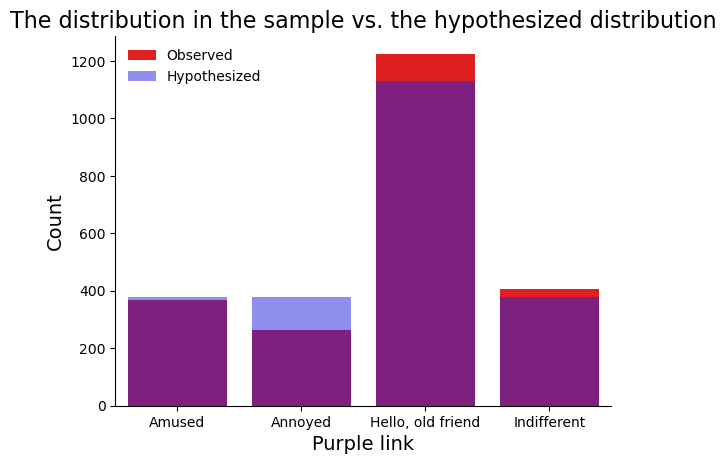

In [8]:
import seaborn as sns

sns.barplot(data = purple_link_counts, 
            x="purple_link", y="n",
            color="red", 
            label="Observed")

sns.barplot(data = hypothesized, 
            x="purple_link", y="n",
            color="blue", 
            label="Hypothesized",
            alpha=0.5)

sns.despine(top=True, right=True)
plt.legend(frameon=False)
plt.xlabel("Purple link", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("The distribution in the sample vs. the hypothesized distribution", fontsize=16)

plt.show()

### Chi-square goodness of fit test

Chi2 measures how far the observed results are from the expectations in each group.

In [9]:
print(hypothesized)

         purple_link      prop            n
0             Amused  0.166667   376.833333
1            Annoyed  0.166667   376.833333
2  Hello, old friend  0.500000  1130.500000
3        Indifferent  0.166667   376.833333


In [10]:
statistic, p_value = chisquare(f_obs=purple_link_counts["n"], f_exp=hypothesized["n"])

In [11]:
print("The p-value is:{}".format(p_value))

if p_value <= alpha:
    print("p_value <= alpha ({}). \nReject the null hypothesis and conclude that the sample distribution of the proportions is different from the hypothesized distributions.".format(alpha))
else:
    print("Failed to reject H0")

The p-value is:1.1261810719413759e-09
p_value <= alpha (0.1). 
Reject the null hypothesis and conclude that the sample distribution of the proportions is different from the hypothesized distributions.
